In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
from matplotlib.font_manager import FontProperties
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')


In [2]:
font = FontProperties()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

In [3]:
df=pd.read_csv("covid_19_india.csv")

In [4]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       9291 non-null   int64 
 1   Date                      9291 non-null   object
 2   Time                      9291 non-null   object
 3   State/UnionTerritory      9291 non-null   object
 4   ConfirmedIndianNational   9291 non-null   object
 5   ConfirmedForeignNational  9291 non-null   object
 6   Cured                     9291 non-null   int64 
 7   Deaths                    9291 non-null   int64 
 8   Confirmed                 9291 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 653.4+ KB


In [6]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,9291.000000,9.291000e+03,9291.000000,9.291000e+03
mean,4646.000000,7.863266e+04,1487.620385,9.183978e+04
std,2682.225009,1.931102e+05,4713.813690,2.166014e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,2323.500000,1.520000e+02,2.000000,5.385000e+02
50%,4646.000000,4.308000e+03,66.000000,6.832000e+03
75%,6968.500000,5.772650e+04,926.500000,7.885600e+04
max,9291.000000,1.737080e+06,47827.000000,1.859367e+06


In [7]:
df.rename({'State/UnionTerritory': 'State'}, axis=1, inplace=True)

In [8]:
df['State'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [9]:
df=df.replace('Telengana','Telangana')
df=df.replace('Telengana***','Telangana')
df=df.replace('Telangana***','Telangana')
df=df.replace('Maharashtra***','Maharashtra')
df=df.replace('Chandigarh***','Chandigarh')
df=df.replace('Punjab***','Punjab')

In [10]:
dropn_indexnames =df[(df['State'] == 'Cases being reassigned to states')].index 
df.drop(dropn_indexnames,inplace=True)

In [11]:
df['State'].unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli', 'Sikkim',
       'Daman & Diu', 'Dadra and Nagar Haveli and Daman and Diu'],
      dtype=object)

In [12]:
df = df.tail(35)


In [13]:
cured=df['Cured'].sum()
deaths=df['Deaths'].sum()
confirmed=df['Confirmed'].sum()
active=confirmed-cured
df['ratio_death']=(df['Deaths']/df['Confirmed'])*100
df['ratio_cured']=(df['Cured']/df['Confirmed'])*100

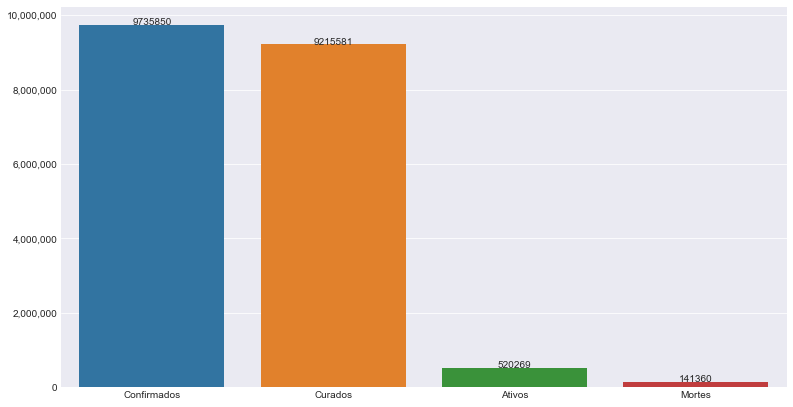

In [14]:
plt.figure(figsize=(13,7))
ax=sns.barplot(x=['Confirmados','Curados','Ativos','Mortes'],y=[confirmed,cured,active,deaths])
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for p in ax.patches:
    ax.annotate('{:0.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+2),ha='center')


In [15]:
df['State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


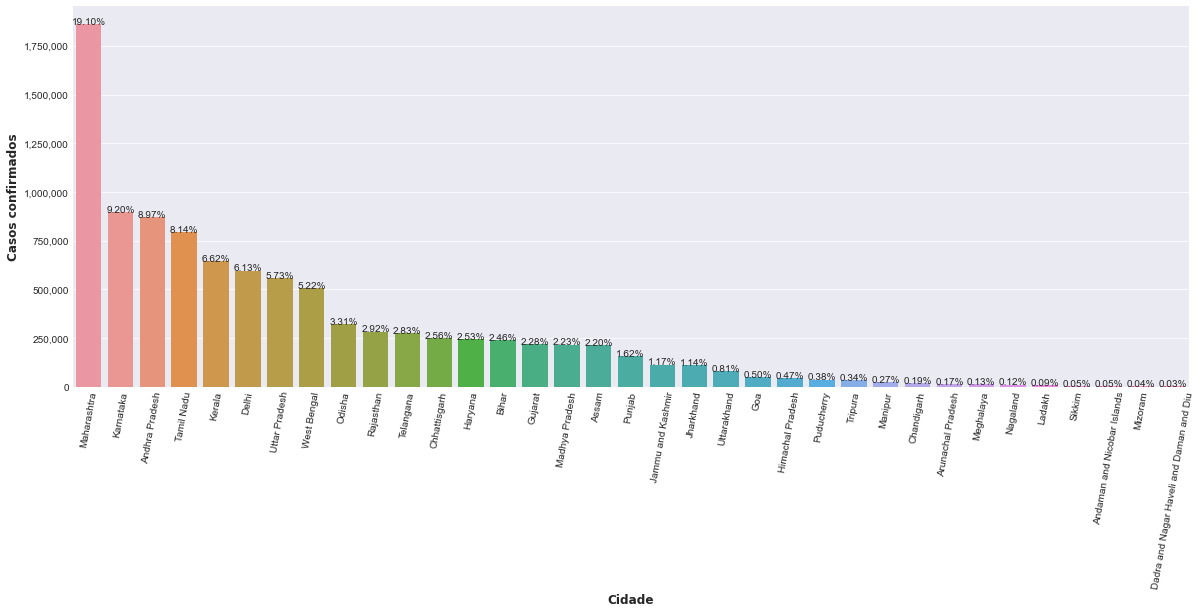

In [16]:
plt.figure(figsize=(20,7))
ax=sns.barplot(x='State',y='Confirmed',data=df,order=df.sort_values('Confirmed',ascending = False).State)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for p in ax.patches:
    ax.annotate('{:0.2f}%'.format(p.get_height()/confirmed*100), (p.get_x()+0.4, p.get_height()+50),ha='center')
plt.rcParams['xtick.labelsize'] = 13
ax.set_ylabel('Casos confirmados',fontproperties=font)
ax.set_xlabel('Cidade',fontproperties=font)
plt.xticks(rotation=80)
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 9256 to 9290
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       35 non-null     int64  
 1   Date                      35 non-null     object 
 2   Time                      35 non-null     object 
 3   State                     35 non-null     object 
 4   ConfirmedIndianNational   35 non-null     object 
 5   ConfirmedForeignNational  35 non-null     object 
 6   Cured                     35 non-null     int64  
 7   Deaths                    35 non-null     int64  
 8   Confirmed                 35 non-null     int64  
 9   ratio_death               35 non-null     float64
 10  ratio_cured               35 non-null     float64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.5+ KB


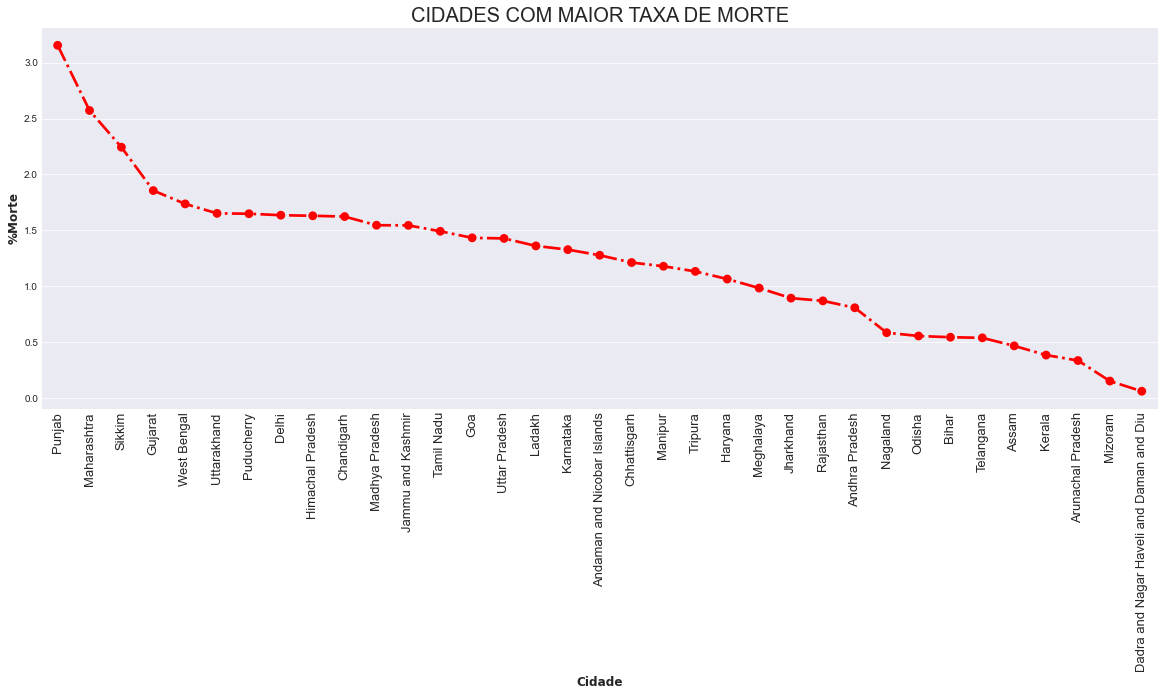

In [18]:
from numpy import median
plt.figure(figsize=(20,7))
ax = sns.pointplot(x="State", y='ratio_death',data=df,color='red',capsize=.2,linestyles=["-."],
                   order=df.sort_values('ratio_death',ascending = False).State)
plt.xticks(rotation=90)
plt.title('CIDADES COM MAIOR TAXA DE MORTE',size=20)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
ax.set_ylabel('%Morte',fontproperties=font)
ax.set_xlabel('Cidade',fontproperties=font)
plt.show()

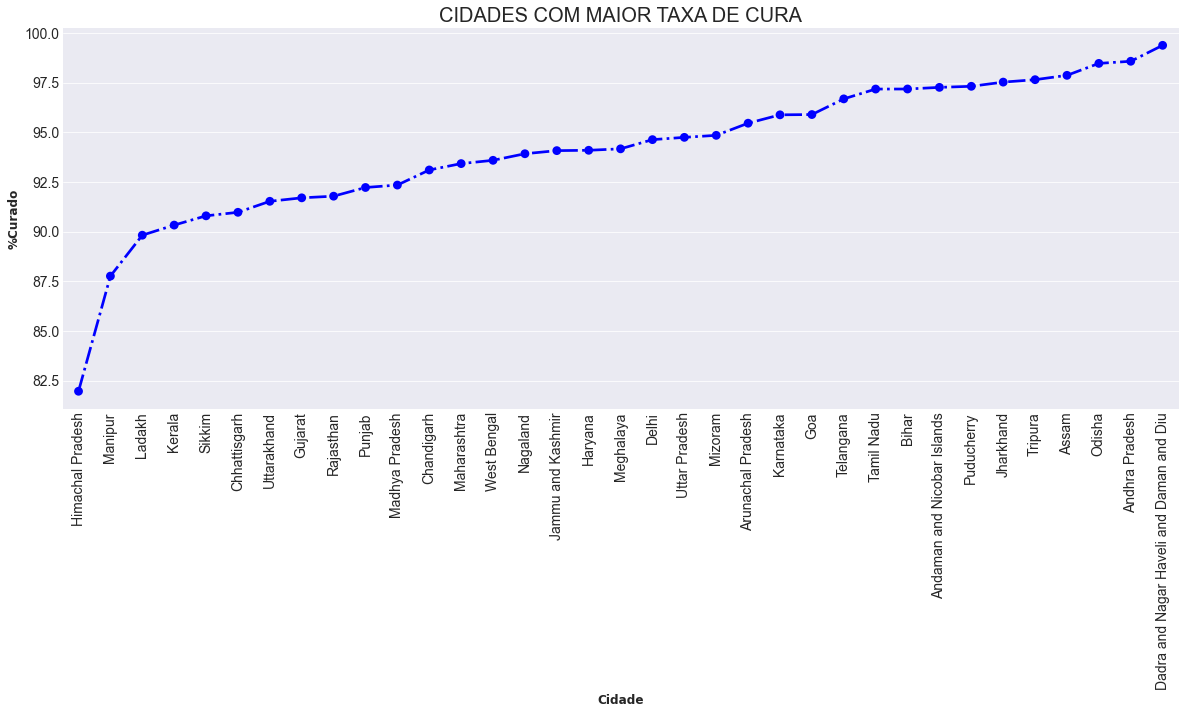

In [19]:
from numpy import median
plt.figure(figsize=(20,7))
ax = sns.pointplot(x="State", y='ratio_cured',data=df,color='blue',capsize=.2,linestyles=["-."],
                  order=df.sort_values('ratio_cured').State)
plt.xticks(rotation=90)
plt.title('CIDADES COM MAIOR TAXA DE CURA',size=20)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
ax.set_ylabel('%Curado',fontproperties=font)
ax.set_xlabel('Cidade',fontproperties=font)
plt.show()

In [20]:
df=pd.read_csv("covid_19_india.csv")
df.rename({'State/UnionTerritory': 'State'}, axis=1, inplace=True)

In [21]:
Maharashtra=df[df.State=='Maharashtra']
Punjab=df[df.State=='Punjab']
DNHDD=df[df.State=='Dadra and Nagar Haveli and Daman and Diu']

In [22]:
Mah = Maharashtra[Maharashtra['Date'].isin(['10/03/20','10/04/20','10/05/20','10/06/20','10/07/20','10/08/20','10/09/20','10/10/20','10/11/20','09/12/20'])]
Pun = Punjab[Punjab['Date'].isin(['10/03/20','10/04/20','10/05/20','10/06/20','10/07/20','10/08/20','10/09/20','10/10/20','10/11/20','09/12/20'])]
DNHDD = DNHDD[DNHDD['Date'].isin(['10/03/20','10/04/20','10/05/20','10/06/20','10/07/20','10/08/20','10/09/20','10/10/20','10/11/20','09/12/20'])]

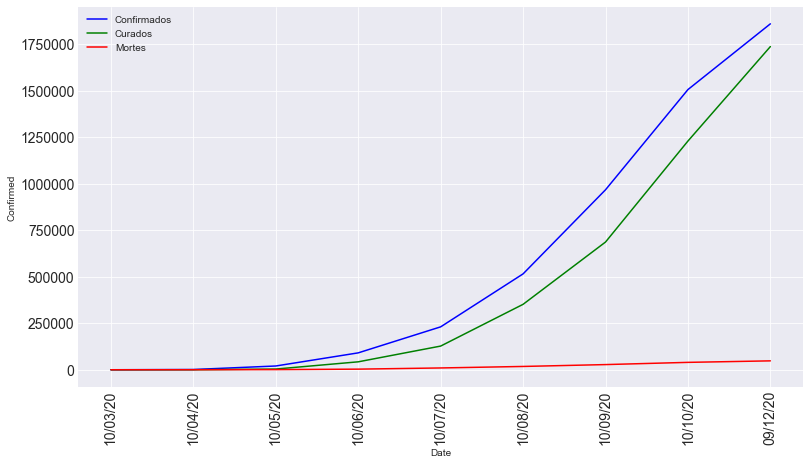

In [23]:
plt.figure(figsize=(13,7))
pp=sns.lineplot(data=Mah,x='Date',y='Confirmed',color='Blue')
pp=sns.lineplot(data=Mah,x='Date',y='Cured',color='Green')
pp=sns.lineplot(data=Mah,x='Date',y='Deaths',color='Red')
pp.set_yticklabels(labels=(pp.get_yticks()*1).astype(int))
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 10
pp.legend(['Confirmados','Curados','Mortes'])
plt.xticks(rotation=90)
plt.show()


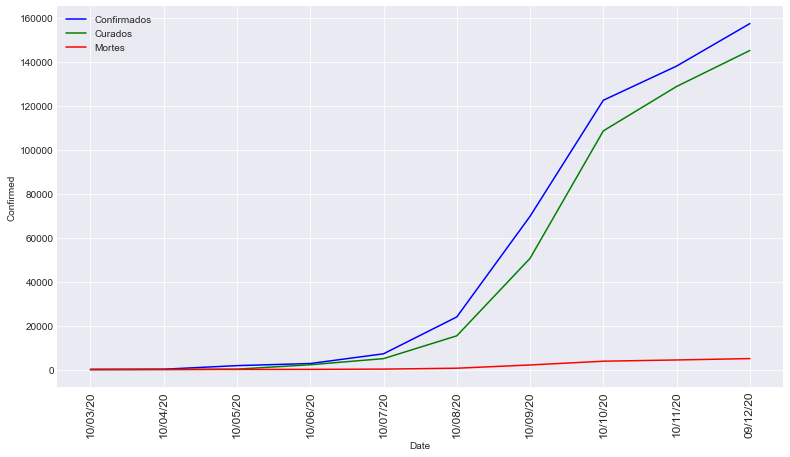

In [24]:
plt.figure(figsize=(13,7))
pp=sns.lineplot(data=Pun,x='Date',y='Confirmed',color='Blue')
pp=sns.lineplot(data=Pun,x='Date',y='Cured',color='Green')
pp=sns.lineplot(data=Pun,x='Date',y='Deaths',color='Red')
pp.set_yticklabels(labels=(pp.get_yticks()*1).astype(int))
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 10
pp.legend(['Confirmados','Curados','Mortes'])
plt.xticks(rotation=90)
plt.show()

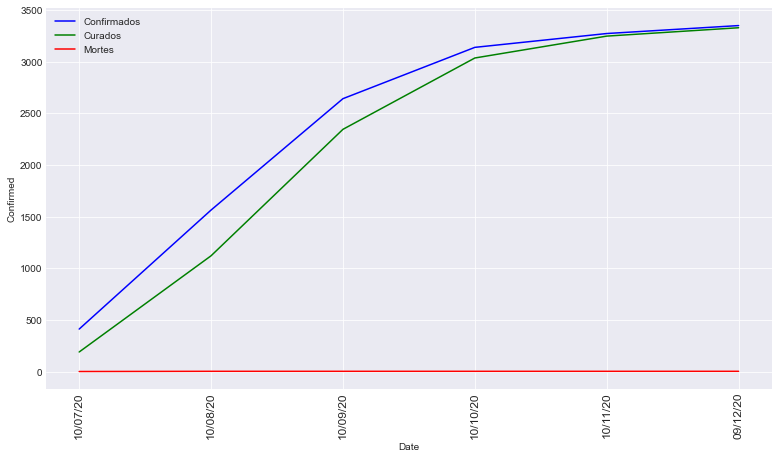

In [25]:
plt.figure(figsize=(13,7))
pp=sns.lineplot(data=DNHDD,x='Date',y='Confirmed',color='Blue')
pp=sns.lineplot(data=DNHDD,x='Date',y='Cured',color='Green')
pp=sns.lineplot(data=DNHDD,x='Date',y='Deaths',color='Red')
pp.set_yticklabels(labels=(pp.get_yticks()*1).astype(int))
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 10
pp.legend(['Confirmados','Curados','Mortes'])
plt.xticks(rotation=90)
plt.show()

In [26]:
all_data = df[df['Date'].isin(['10/03/20','10/04/20','10/05/20','10/06/20','10/07/20','10/08/20','10/09/20','10/10/20','10/11/20','09/12/20'])]

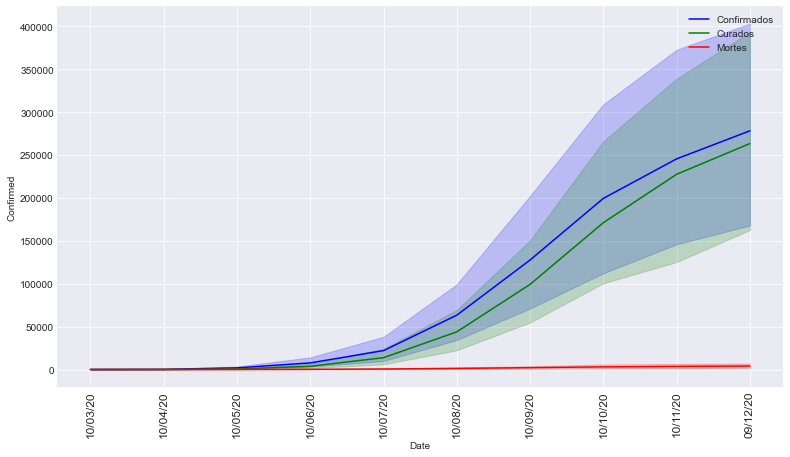

In [27]:
plt.figure(figsize=(13,7))
pp=sns.lineplot(data=all_data,x='Date',y='Confirmed',color='Blue')
pp=sns.lineplot(data=all_data,x='Date',y='Cured',color='Green')
pp=sns.lineplot(data=all_data,x='Date',y='Deaths',color='Red')
pp.set_yticklabels(labels=(pp.get_yticks()*1).astype(int))
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 10
plt.xticks(rotation=90)
pp.legend(['Confirmados','Curados','Mortes'])
plt.show()
